In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [2]:
from glob import iglob
from os.path import basename, splitext, join

## Improve display quality on the notebook
**Note:** although we'll set a higher dpi for showing images, there are still (many) artifacts introduced when seeing them inside the notebook, thus, you should always check the images saved to the output folder (`o/`).

In [3]:
%matplotlib inline

In [4]:
import matplotlib as mpl
mpl.rcParams['figure.dpi'] = 60 # 150 to 300 are good values

## Define display functions

In [5]:
def show(bgr_img, img_title="", grayscale=False):
    plt.axis('off')
    plt.title(img_title)
    if not grayscale:
        rgb_img = cv2.cvtColor(bgr_img.astype('uint8'), cv2.COLOR_BGR2RGB)
        plt.imshow(rgb_img, vmin=0, vmax=255)
    else:
        gray_img = cv2.cvtColor(bgr_img.astype('uint8'), cv2.COLOR_BGR2GRAY)
        plt.imshow(gray_img, cmap="gray", vmin=0, vmax=255)
    plt.show()

In [6]:
def show_in_row(rgb_images, grayscale=False):
    fig = plt.figure(figsize=(16, 16))
    n_of_rows = len(rgb_images)
    for i in range(n_of_rows):
        a = fig.add_subplot(1, n_of_rows, i + 1)
        if not grayscale:
            plt.imshow(rgb_images[i], vmin=0, vmax=255)
        else:
            plt.imshow(cv2.cvtColor(rgb_images[i].astype('uint8'), cv2.COLOR_BGR2GRAY), cmap='gray', vmin=0, vmax=255)
        plt.axis('off')

In [7]:
def show_split_channels(bgr_img, grayscale=False):
    rgb_img = cv2.cvtColor(bgr_img.astype('uint8'), cv2.COLOR_BGR2RGB)
    height, width, _ = rgb_img.shape
    zeros = np.zeros((height, width), dtype='uint8')
    r_img = np.dstack((rgb_img[..., 0], zeros, zeros))
    g_img = np.dstack((zeros, rgb_img[..., 1], zeros))
    b_img = np.dstack((zeros, zeros, rgb_img[..., 2]))
    show_in_row([rgb_img, r_img, g_img, b_img], grayscale)

In [8]:
def show_bit_planes(bgr_img, img_title="", bit_planes=[0, 1, 2, 7], grayscale=True):
    if bit_planes == 'all':
        bit_planes = [0, 1, 2, 3, 4, 5, 6, 7]
    for plane in reversed(bit_planes):
        img = (bgr_img >> plane) & 1
        img = np.where(img, 255, 0)
        title = f"{img_title} (bit plane {plane})"
        print(title)
        show_split_channels(img, grayscale)
        plt.show()

## Load images

In [9]:
IMAGES_FOLDER_PATH = join("o", "*") # NOTE change this path if you want to try images outside of the 'o/' folder
IMAGES_PATH = join(IMAGES_FOLDER_PATH, "*.png")

In [10]:
# load images into an array of tuples: (img: np.ndarray, img_name: str)
examples = []
for img_fname in iglob(IMAGES_PATH):
    img_name = splitext(basename(img_fname))[0]
    img = cv2.imread(img_fname)
    examples.append((img, img_name))

In [11]:
[(i, img_fname) for i, (_, img_fname) in enumerate(examples)]

[(0, 'baboon-0'),
 (1, 'baboon-1'),
 (2, 'baboon-2'),
 (3, 'baboon-7'),
 (4, 'cornellbox-0'),
 (5, 'cornellbox-1'),
 (6, 'cornellbox-2'),
 (7, 'cornellbox-3'),
 (8, 'cornellbox-4'),
 (9, 'cornellbox-5'),
 (10, 'cornellbox-6'),
 (11, 'cornellbox-7'),
 (12, 'eye-0'),
 (13, 'eye-1'),
 (14, 'eye-2'),
 (15, 'eye-3'),
 (16, 'eye-4'),
 (17, 'eye-5'),
 (18, 'eye-6'),
 (19, 'eye-7'),
 (20, 'ic-0'),
 (21, 'ic-1'),
 (22, 'ic-2'),
 (23, 'ic-3'),
 (24, 'ic-4'),
 (25, 'ic-5'),
 (26, 'ic-6'),
 (27, 'ic-7'),
 (28, 'lenna-decode-0'),
 (29, 'lenna-encode-0'),
 (30, 'lenna-encode-1'),
 (31, 'lenna-encode-2'),
 (32, 'lenna-encode-3'),
 (33, 'lenna-encode-4'),
 (34, 'lenna-encode-5'),
 (35, 'lenna-encode-6'),
 (36, 'lenna-encode-7'),
 (37, 'watch-0'),
 (38, 'watch-1'),
 (39, 'watch-2')]

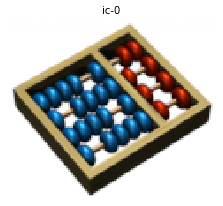

ic-0 (bit plane 7)


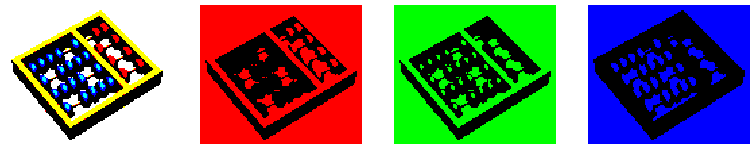

ic-0 (bit plane 2)


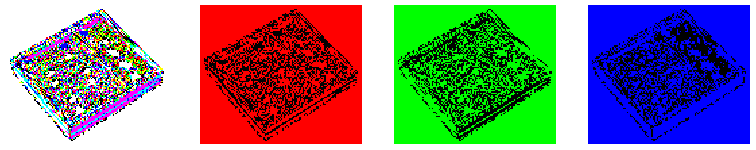

ic-0 (bit plane 1)


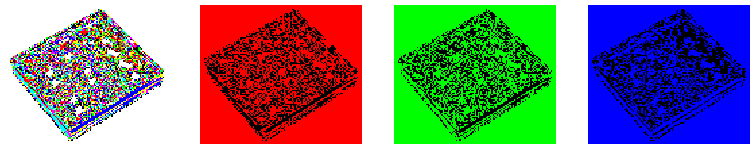

ic-0 (bit plane 0)


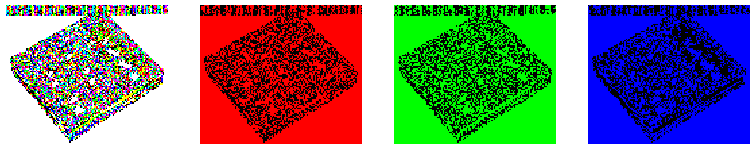

In [12]:
idx = 20
show(*examples[idx])
show_bit_planes(*examples[idx], grayscale=False)

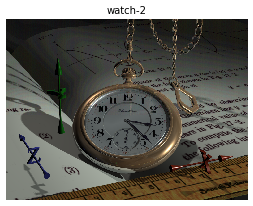

watch-2 (bit plane 7)


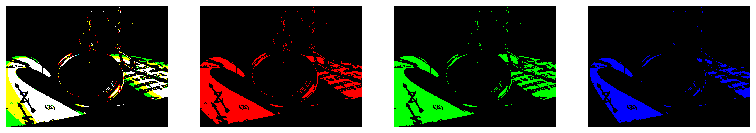

watch-2 (bit plane 2)


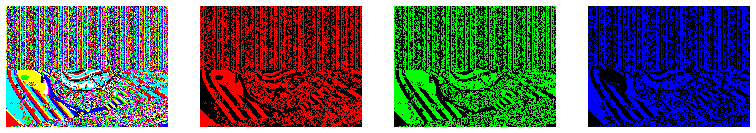

watch-2 (bit plane 1)


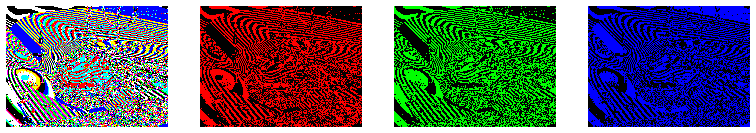

watch-2 (bit plane 0)


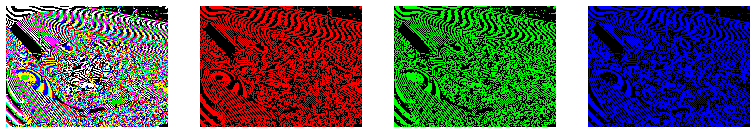

In [13]:
idx = 39
show(*examples[idx])
show_bit_planes(*examples[idx], grayscale=False)

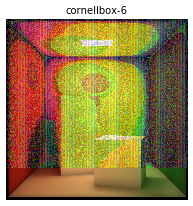

cornellbox-6 (bit plane 7)


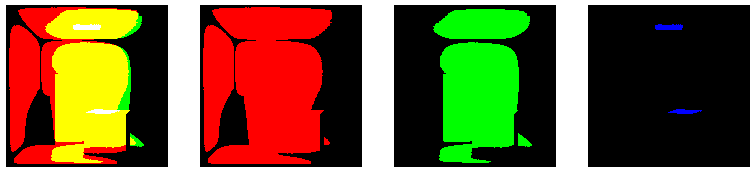

cornellbox-6 (bit plane 6)


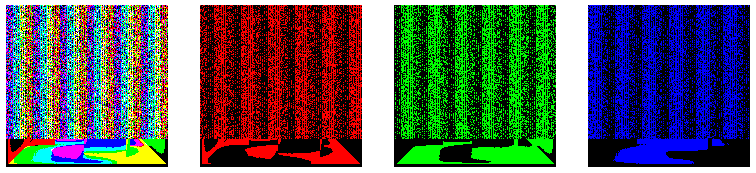

cornellbox-6 (bit plane 5)


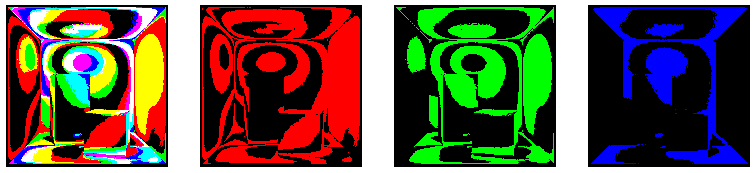

cornellbox-6 (bit plane 4)


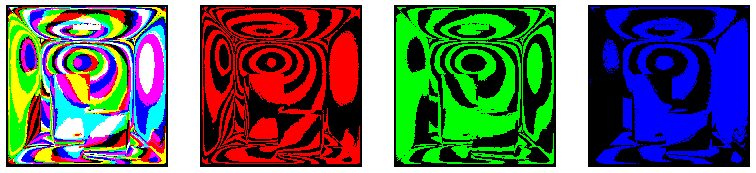

cornellbox-6 (bit plane 3)


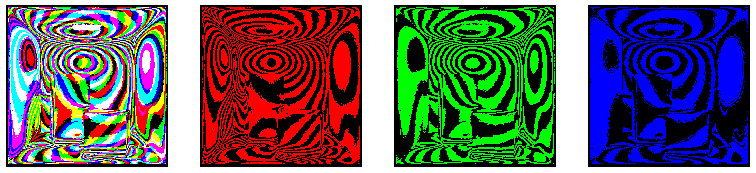

cornellbox-6 (bit plane 2)


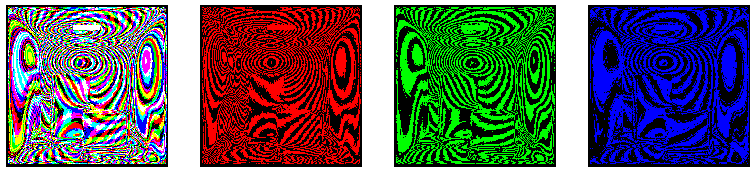

cornellbox-6 (bit plane 1)


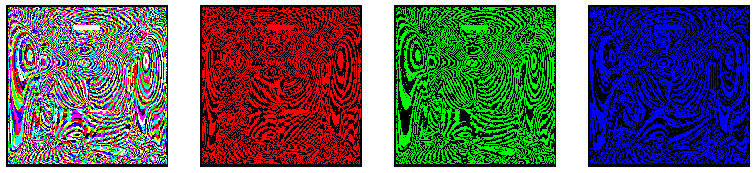

cornellbox-6 (bit plane 0)


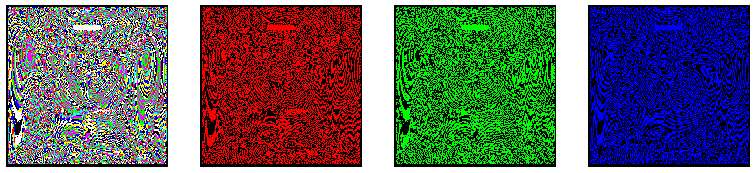

In [14]:
idx = 10
show(*examples[idx])
show_bit_planes(*examples[idx], bit_planes='all', grayscale=False)

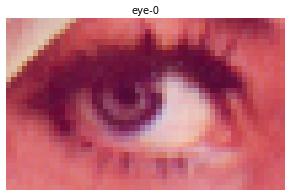

eye-0 (bit plane 7)


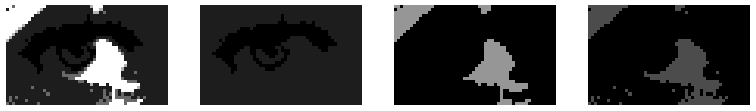

eye-0 (bit plane 2)


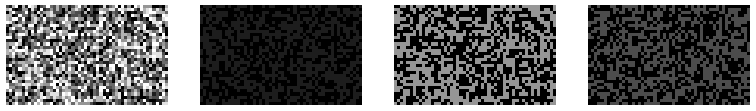

eye-0 (bit plane 1)


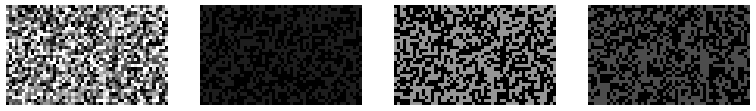

eye-0 (bit plane 0)


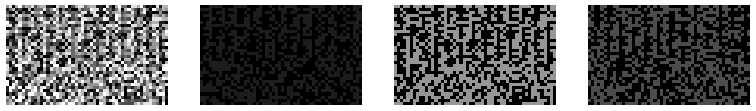

In [15]:
idx = 12
show(*examples[idx])
show_bit_planes(*examples[idx], grayscale=True)

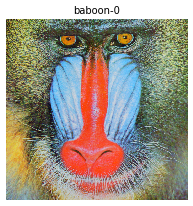

baboon-0 (bit plane 0)


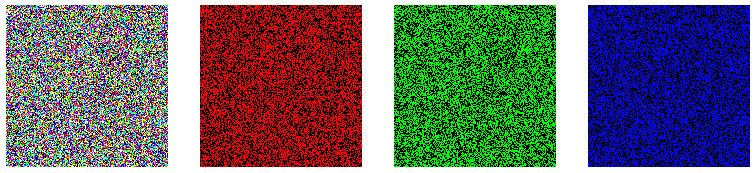

In [18]:
idx = 0
show(*examples[idx])
show_bit_planes(*examples[idx], bit_planes=[0], grayscale=False)

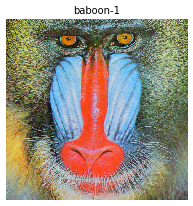

baboon-1 (bit plane 1)


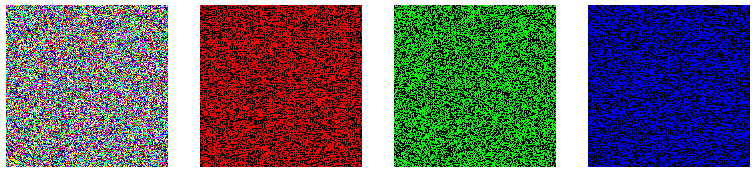

In [19]:
idx = 1
show(*examples[idx])
show_bit_planes(*examples[idx], bit_planes=[1], grayscale=False)

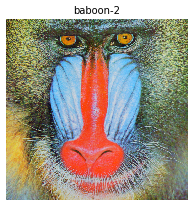

baboon-2 (bit plane 2)


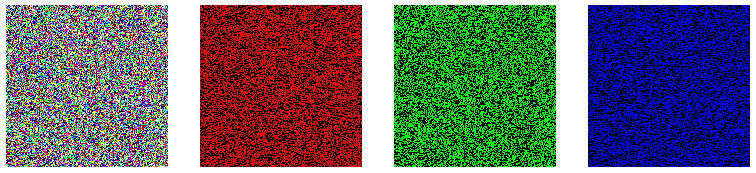

In [20]:
idx = 2
show(*examples[idx])
show_bit_planes(*examples[idx], bit_planes=[2], grayscale=False)

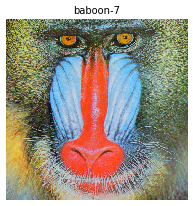

baboon-7 (bit plane 7)


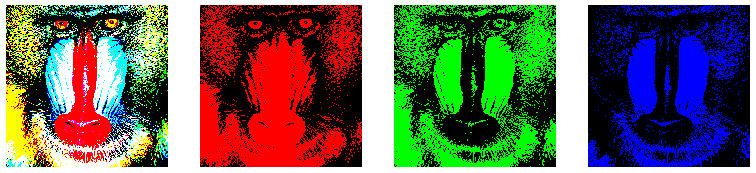

baboon-7 (bit plane 6)


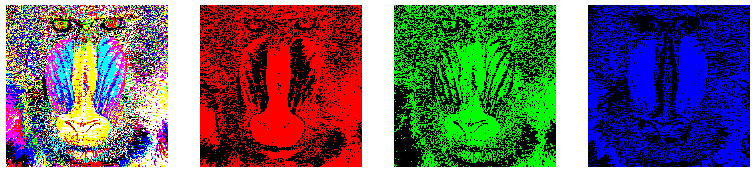

baboon-7 (bit plane 5)


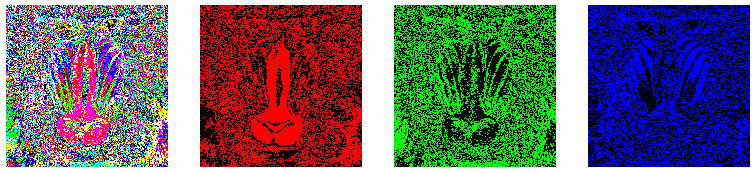

baboon-7 (bit plane 4)


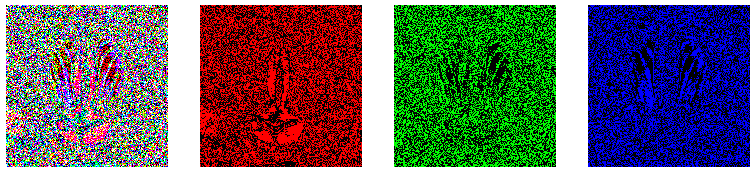

baboon-7 (bit plane 3)


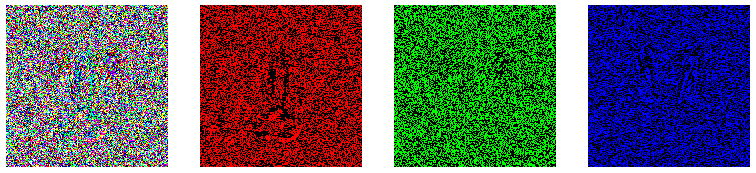

baboon-7 (bit plane 2)


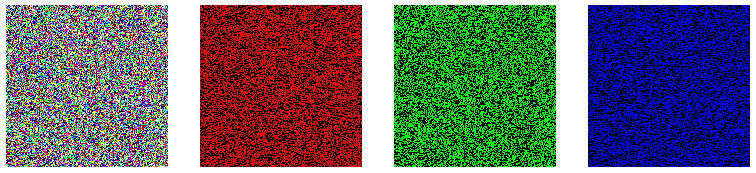

baboon-7 (bit plane 1)


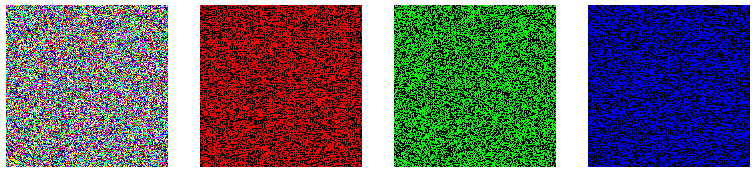

baboon-7 (bit plane 0)


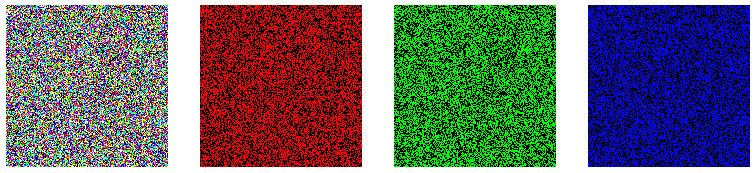

In [22]:
idx = 3
show(*examples[idx])
show_bit_planes(*examples[idx], bit_planes='all', grayscale=False)